In [1]:
import pandas as pd # Dataframe
import numpy as np # maths

################ Machine Learning #######################
from sklearn import preprocessing # Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


################ Data visualization #######################
import matplotlib.pyplot as plt # Plot 
plt.rc("font", size=14)
import seaborn as sns # Plot advanced version of matplotlib
import plotly
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Importing dataset

In [2]:
# Read the data in
data = pd.read_csv(r"C:\Users\Sai\Desktop\python\Machine Learning\Logistic Regression\Credit_Card.csv")

# Column name and Dimension & Dropping Missing Value

In [3]:
data

,Gender,balance,income,target
0,M,729.526495,44361.62507,0
1,F,817.180407,12106.13470,0
2,M,1073.549164,31767.13895,0
3,M,529.250605,35704.49394,0
4,M,785.655883,38463.49588,0
...,...,...,...,...
9995,M,711.555020,52992.37891,0
9996,M,757.962918,19660.72177,0
9997,M,845.411989,58636.15698,0
9998,M,1569.009053,36669.11236,0


In [4]:
data=data.dropna()  ## Row delete
data.shape # dimension

(10000, 4)

# Data Structure or type 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   10000 non-null  object 
 1   balance  10000 non-null  float64
 2   income   10000 non-null  float64
 3   target   10000 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 390.6+ KB


# Data Pre-Processing

#### Assign Lables to  Categorical data 

In [6]:
data.Gender.value_counts()

M    7056
F    2944
Name: Gender, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
data.Gender=(LabelEncoder().fit_transform(data.Gender))  # F= 0 & M= 1

In [8]:
data.Gender.value_counts()

1    7056
0    2944
Name: Gender, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gender   10000 non-null  int32  
 1   balance  10000 non-null  float64
 2   income   10000 non-null  float64
 3   target   10000 non-null  int64  
dtypes: float64(2), int32(1), int64(1)
memory usage: 351.6 KB


In [10]:
data.head()

,Gender,balance,income,target
0,1,729.526495,44361.62507,0
1,0,817.180407,12106.13470,0
2,1,1073.549164,31767.13895,0
3,1,529.250605,35704.49394,0
4,1,785.655883,38463.49588,0


# EDA

* Bad Rate Analysis == 0 : Good & 1 : Bad
* Bivariate Analysis 

In [11]:
data.target.value_counts()

0    9667
1     333
Name: target, dtype: int64

In [12]:
(333/10000)*100  # 3.3% customer are bad

3.3300000000000005

<AxesSubplot:xlabel='target', ylabel='count'>

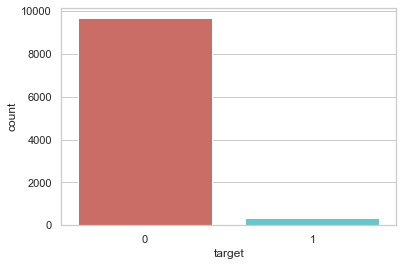

In [13]:
sns.countplot(x='target',data=data,palette='hls')

In [14]:
data.groupby('target').mean()

,Gender,balance,income
target,,,
0,0.708596,803.94375,33566.166625
1,0.618619,1747.82169,32089.147124


* Customer with more balance have higher chance to become bad customer

# Visualizations

Text(0, 0.5, 'Frequency')

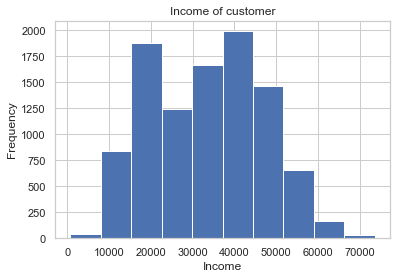

In [15]:
data.income.hist()
plt.title('Income of customer')
plt.xlabel('Income')
plt.ylabel('Frequency')
#plt.savefig('Income_age')

Text(0, 0.5, 'Frequency')

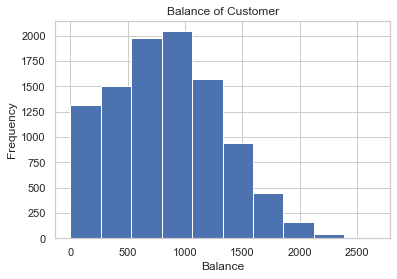

In [16]:
data.balance.hist()
plt.title('Balance of Customer')
plt.xlabel('Balance')
plt.ylabel('Frequency')
#plt.savefig('Balance_age')

# Identify & Treatment of Outlier 

<AxesSubplot:ylabel='income'>

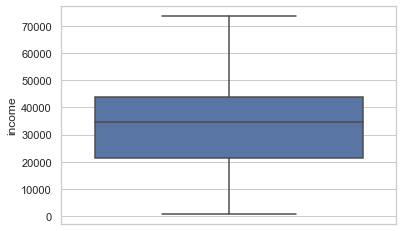

In [17]:
sns.boxplot(y='income',data=data)  # Single Variable

<AxesSubplot:ylabel='balance'>

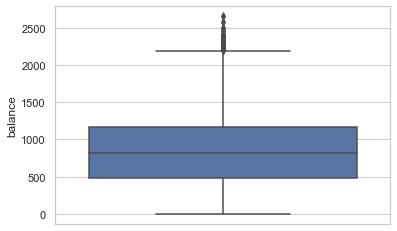

In [18]:
sns.boxplot(y='balance',data=data)  # Single Variable

In [19]:
q1 = data['balance'].quantile(0.25)
q3 = data['balance'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

2193.1743093

In [20]:
data['balance']=np.where(data['balance'] > upper_limit,upper_limit,data['balance']) 
# upper limit

<AxesSubplot:ylabel='balance'>

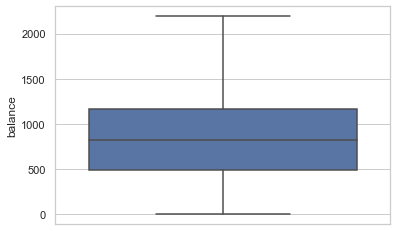

In [21]:
sns.boxplot(y='balance',data=data)  # Single Variable

# Step 3 : Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [22]:
data_final=data

In [23]:
data_final.head()

,Gender,balance,income,target
0,1,729.526495,44361.62507,0
1,0,817.180407,12106.13470,0
2,1,1073.549164,31767.13895,0
3,1,529.250605,35704.49394,0
4,1,785.655883,38463.49588,0


In [24]:
# define our input variable (X) & output variable
X = data_final.drop('target', axis = 1)
Y = data_final[['target']]
# Split X and y into X_
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.30, random_state=1)

# Step 4 : Performing Logistic Regression

In [25]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Gender,balance,income,target
2228,0,1371.468372,24248.55196,0
5910,1,0.000000,22827.18449,0
1950,1,708.579795,21728.82020,0
2119,1,1031.044588,38199.04679,0
5947,1,279.116876,30144.43250,0


# Hypothesis

* H0 :- There is no log linear relationship between Target and Gender , Income & Balance

Vs 

* H1 :- There is log linear relationship between Target and Gender , Income & Balance

Alpha = 0.05

In [26]:
# Needed to run the logistic regression
import statsmodels.formula.api as smf
result=smf.logit("target~C(Gender)+balance+income",data=train).fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.078130
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.480      
Dependent Variable: target           AIC:              1101.8224  
Date:               2022-05-25 04:14 BIC:              1129.2371  
No. Observations:   7000             Log-Likelihood:   -546.91    
Df Model:           3                LL-Null:          -1052.0    
Df Residuals:       6996             LLR p-value:      1.0801e-218
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Intercept      -11.9779   0.5377 -22.2775 0.0000 -13.0317 -10.9241
C(Gender)[T.1]   0.6692   0.2803   2.3876 0.0170   0.1198   1.2185
balance          0.0060   0.0003  21.1194 0.0000   0.0055   0.0066
income           0.0000   0.0000   0.4037 0.6864  -0.0000   0.0000
==================================================================

"""

In [27]:
model=smf.logit("target~C(Gender)+balance",data=train).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.078142
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.480      
Dependent Variable: target           AIC:              1099.9855  
Date:               2022-05-25 04:14 BIC:              1120.5465  
No. Observations:   7000             Log-Likelihood:   -546.99    
Df Model:           2                LL-Null:          -1052.0    
Df Residuals:       6997             LLR p-value:      4.6162e-220
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     10.0000                                       
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
Intercept      -11.9105   0.5099 -23.3570 0.0000 -12.9100 -10.9111
C(Gender)[T.1]   0.7567   0.1771   4.2736 0.0000   0.4096   1.1037
balance          0.0060   0.0003  21.1330 0.0000   0.0055   0.0066
==================================================================

"""

* We Reject Ho 

### Conclusion :- 

There is log linear relationship between Target and Gender & Balance


# Odds Ratio

In [28]:
model.params   # coefficient 

Intercept        -11.910534
C(Gender)[T.1]     0.756655
balance            0.006046
dtype: float64

In [29]:
Model_Odds=pd.DataFrame(np.exp(model.params),columns=["Odds_Ratio"])
Model_Odds

,Odds_Ratio
Intercept,0.000007
C(Gender)[T.1],2.131137
balance,1.006065


* Male have 2.13 times higher odds of not paying Credit Card Bill as compared to Female  

# Step 6 : Predictions on Train Dataset

In [30]:
train.head()

,Gender,balance,income,target
2228,0,1371.468372,24248.55196,0
5910,1,0.000000,22827.18449,0
1950,1,708.579795,21728.82020,0
2119,1,1031.044588,38199.04679,0
5947,1,279.116876,30144.43250,0


In [31]:
train['Probability']=model.predict(train)
train.head()

,Gender,balance,income,target,Probability
2228,0,1371.468372,24248.55196,0,0.026126
5910,1,0.000000,22827.18449,0,0.000014
1950,1,708.579795,21728.82020,0,0.001038
2119,1,1031.044588,38199.04679,0,0.007247
5947,1,279.116876,30144.43250,0,0.000077


* 2.6% chances the customer will not pay the credit card bill

In [32]:
train['Predicted']=np.where(train['Probability'] >= 0.7,1,0)  #thershold  >0.7
train.sort_values(by='target',ascending=False).head()

,Gender,balance,income,target,Probability,Predicted
2010,1,1823.751426,53526.35641,1,0.468271,0
3248,1,1898.323497,61011.21595,1,0.580248,0
1023,0,1424.559323,25398.19744,1,0.035662,0
7811,1,2024.820212,64135.43108,1,0.748121,1
8309,0,1874.822612,14957.81633,1,0.360094,0


# Step 7 : Model Performance Metrics

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['target'])
print(matrix)

[[6745  193]
 [  13   49]]


In [34]:
Accuracy_Train=((6745+49)/(7000)*100)
print(Accuracy_Train)

97.05714285714285


* Accuracy of Model is 97% , So we say Good Model 

In [35]:
from sklearn.metrics import classification_report
print(classification_report(train['target'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6758
           1       0.79      0.20      0.32       242

    accuracy                           0.97      7000
   macro avg       0.88      0.60      0.65      7000
weighted avg       0.97      0.97      0.96      7000



* Accuracy of Bad Customer Capture by Model is 20% ( Sensitivity )
* Accuracy of Good Customer Capture by Model is 100% ( specificity) 
* Accuracy of Predicted Bad Customer And often Correct is 79% 
* Accuracy of Predicted Good Customer And often Correct is 97% 


# Step 8 : Predictions on Test Dataset

In [36]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Gender,balance,income,target
9953,0,776.544280,14229.72812,0
3850,1,1014.599104,51438.71020,0
4962,1,681.693576,33327.11303,0
3886,0,969.898685,17940.11913,0
5437,0,1577.083581,15230.82060,0


In [37]:
test['Probability']=model.predict(test)
test.head()

,Gender,balance,income,target,Probability
9953,0,776.544280,14229.72812,0,0.000735
3850,1,1014.599104,51438.71020,0,0.006565
4962,1,681.693576,33327.11303,0,0.000882
3886,0,969.898685,17940.11913,0,0.002361
5437,0,1577.083581,15230.82060,0,0.085087


In [38]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,Gender,balance,income,target,Probability,Predicted
9953,0,776.544280,14229.72812,0,0.000735,0
3850,1,1014.599104,51438.71020,0,0.006565,0
4962,1,681.693576,33327.11303,0,0.000882,0
3886,0,969.898685,17940.11913,0,0.002361,0
5437,0,1577.083581,15230.82060,0,0.085087,0


# Step 9 : Model Performance Metrics on Test data 

In [39]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['target'])
print(matrix)

[[2904   70]
 [   5   21]]


In [40]:
Accuracy_test=((2904+21)/(3000)*100)
Accuracy_test

97.5

* Accuracy of Model Performance on Test data is 97% , So we say Good Model Performance 

In [41]:
from sklearn.metrics import classification_report
print(classification_report(test['target'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2909
           1       0.81      0.23      0.36        91

    accuracy                           0.97      3000
   macro avg       0.89      0.61      0.67      3000
weighted avg       0.97      0.97      0.97      3000



* Accuracy of Bad Customer Capture by Model is 23% 
* Accuracy of Good Customer Capture by Model is 100% 
* Accuracy of Predicted Bad Customer And often Correct is 81% 
* Accuracy of Predicted Good Customer And often Correct is 98% 


# Finish 

model.param  #only we want to submit 

## Manual Prediction

In [42]:
# sort the pandas dataframe by descending value of single column
train.sort_values(by='Predicted',ascending=False,inplace=True)

train.head()

,Gender,balance,income,target,Probability,Predicted
2096,0,2193.174309,20030.16512,1,0.794108,1
2002,1,2005.575128,36636.00859,1,0.725569,1
8459,1,2063.571934,37372.75849,1,0.789667,1
8264,1,2193.174309,37113.88307,1,0.891535,1
8399,1,2155.288986,34787.25268,1,0.867319,1


#### Model Coefficients

In [43]:
model.params

Intercept        -11.910534
C(Gender)[T.1]     0.756655
balance            0.006046
dtype: float64

# Manual by Function

In [44]:
import math
def Manual_Prediction(gender,balance):
    z=-11.910534+0.756655*gender+0.006046*balance  
    a=math.exp(-z)
    y=round(1/(1+a),4)
    return y

#### For Male Customer

In [45]:
Manual_Prediction(1,2005.575128)

0.7255

* 72.5% chance that customer who is male and have balance = 2005 ,he will not pay the credit card bill

#### For Female Customer

In [46]:
train.head(5)

,Gender,balance,income,target,Probability,Predicted
2096,0,2193.174309,20030.16512,1,0.794108,1
2002,1,2005.575128,36636.00859,1,0.725569,1
8459,1,2063.571934,37372.75849,1,0.789667,1
8264,1,2193.174309,37113.88307,1,0.891535,1
8399,1,2155.288986,34787.25268,1,0.867319,1


In [47]:
Manual_Prediction(0,2193.174309)

0.794

* 79% chance that customer is female and have balance = 2193 Indicate will not pay the credit card bill

# Another Method Logistics 

In [48]:
X_train_1=X_train[['Gender', 'balance']]

In [49]:
X_test_1=X_test[['Gender', 'balance']]

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
model_2=logreg.fit(X_train_1, y_train)

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Step 10 :- ROCR & KS PLOT

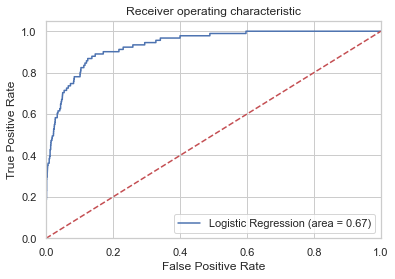

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model_2.predict(X_test_1))
fpr, tpr, thresholds= roc_curve(y_test, model_2.predict_proba(X_test_1)
                                 [:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'
         % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

### Need to install first
pip install scikit-plot

import scikitplot as skplt
y_probas = model_2.predict_proba(X_test_1)
skplt.metrics.plot_ks_statistic(y_test, y_probas)
plt.show()

#### For Male Customer

z=-11.602065+0.704533*1+0.005836*1823.751426
z

import math
a=math.exp(-z)
a

b=1+a
c=1/b
round(c,4)

#### For Female Customer

# sort the pandas dataframe by descending value of single column
train.sort_values(by='Gender',inplace=True)

train.head()

z=-11.910534+0.756655*0+0.006046*1409.989102
z

import math
a=math.exp(-z)
a

b=1+a
c=1/b
round(c,4)

# Deployment 

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train)

import os
os.chdir(r"C:\Users\User\Desktop\Python Code\End_to_End Project\Credit_Card_logistics")
import pickle
#pickle.dump(output, open('build.pkl','wb'))
model=pickle.load(open('build.pkl','rb'))

C:\Users\Sai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\User\\Desktop\\Python Code\\End_to_End Project\\Credit_Card_logistics'

In [ ]:
model.predict([[1,2063.571934,37372.75849]])

In [ ]:
model.predict([[0,2193.174309,25706.64777]])

In [ ]:
train['out']=model.predict(X_train)
train